In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
models_path = Path('best_model')

In [2]:
NUM_EPOCHS = 100
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetSmall()
mobnet_lrg = MobileNetLarge()
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [3]:
model_name = "ResNet18"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 79, device)
print("Done")

Done


In [4]:
model_name = "ResNet50"
model = ResNet50
res50_results, final_res50_model, best_res50_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 84, device)

print("Done")

Done


In [5]:
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 16, device)
print("Done")

Done


In [6]:
model_name = "MobileNetLarge"
model = MobileNetLarge
mobnet_lrg_results, final_mobnet_lrg_model, best_mobnet_lrg_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 5, device)
print("Done")

Done


In [14]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 31, device)
print("Done")

Done


ValueError: x and y must have same first dimension, but have shapes (60,) and (98,)

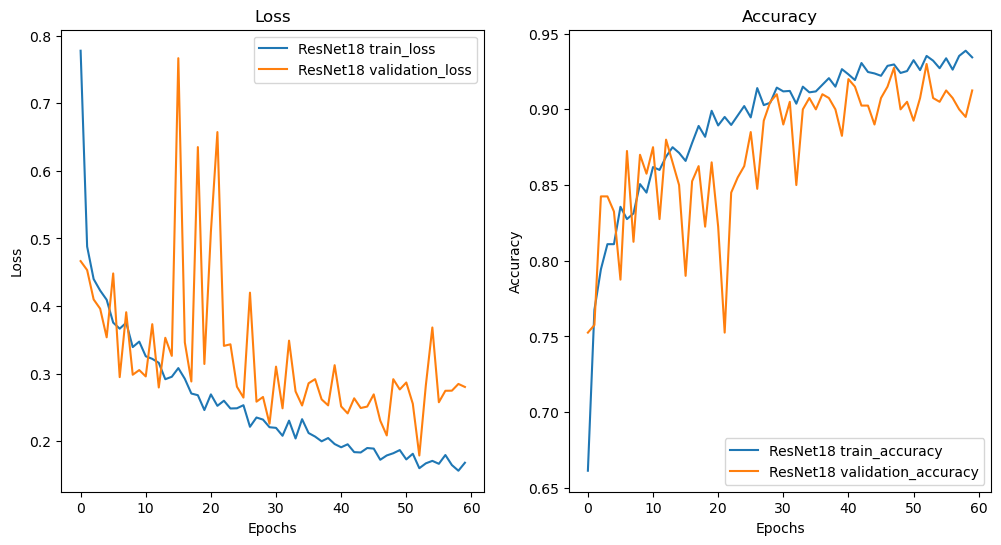

In [ ]:
models_results = [
    res18_results[0],
    res50_results[0],
    mobnet_sml_results[0],
    mobnet_lrg_results[0],
    effnetb0_results[0]
]

models_titles =[
    "ResNet18",
    "ResNet50",
    "MobileNet V3 Small",
    "MobileNet V3 Large",
    "EfficientNet B0"
]

plot_all_loss_curves(models_results, models_titles)

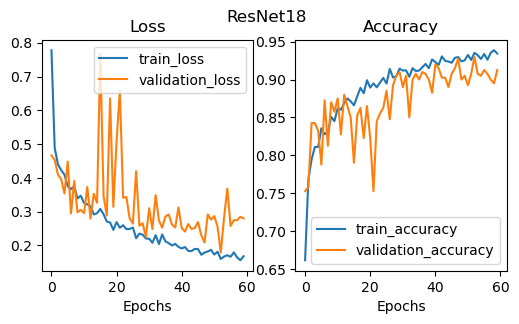

In [15]:
plot_loss_curves(res18_results[0],"ResNet18")

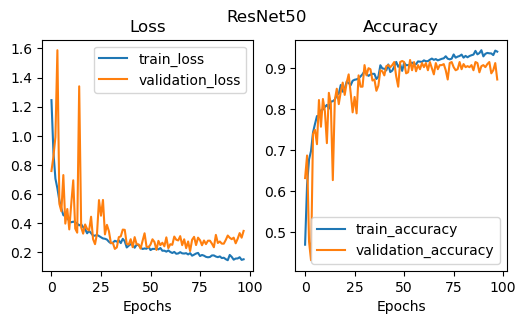

In [16]:
plot_loss_curves(res50_results[0],"ResNet50")

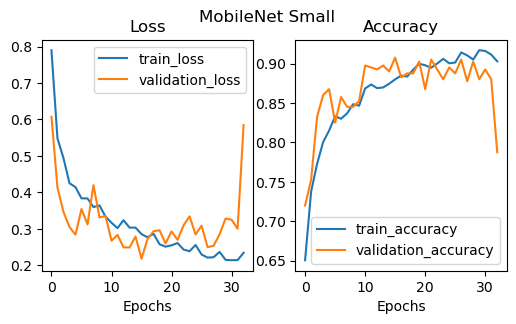

In [17]:
plot_loss_curves(mobnet_sml_results[0],"MobileNet Small")

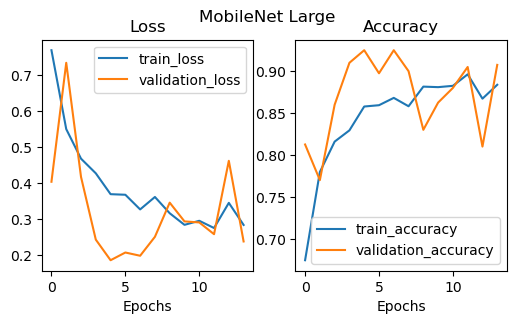

In [18]:
plot_loss_curves(mobnet_lrg_results[0],"MobileNet Large")

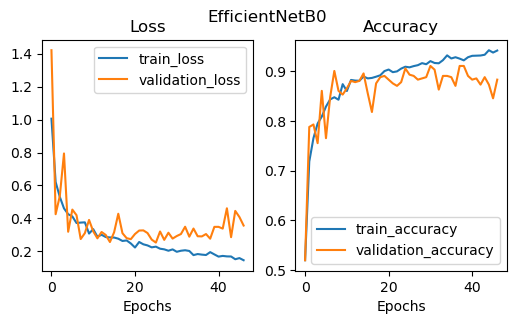

In [19]:
plot_loss_curves(effnetb0_results[0],"EfficientNetB0")

In [20]:
res18_results[2]
res50_results[2]
mobnet_sml_results[2]
mobnet_lrg_results[2]
effnetb0_results[2]

{'model_name': 'EfficientNet',
 'model_loss': 0.408039391040802,
 'model_acc': 87.5,
 'model_inf_time': 129.07028381347655,
 'std_inf_time': 28.04897537437283}

In [21]:
print(max(res18_results[0]['validation_acc']))

0.93


[0.93, 0.92, 0.9075, 0.925, 0.91]


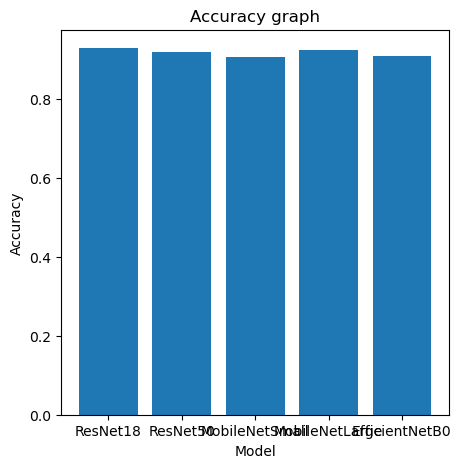

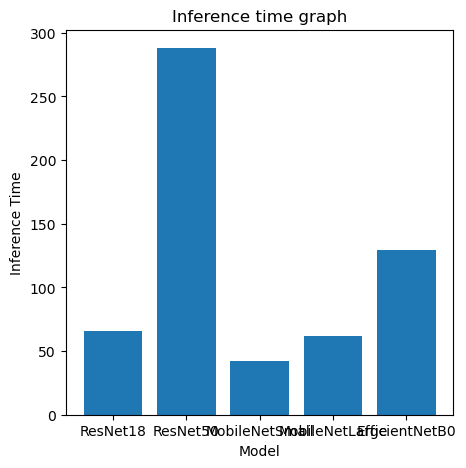

In [22]:
models=['ResNet18', 'ResNet50', 'MobileNetSmall', 'MobileNetLarge', 'EfficientNetB0']
inference_time = [res18_results[2]['model_inf_time'],res50_results[2]['model_inf_time'], mobnet_sml_results[2]['model_inf_time'], mobnet_lrg_results[2]['model_inf_time'], effnetb0_results[2]['model_inf_time']]
accuracy = [max(res18_results[0]['validation_acc']), max(res50_results[0]['validation_acc']), max(mobnet_sml_results[0]['validation_acc']), max(mobnet_lrg_results[0]['validation_acc']), max(effnetb0_results[0]['validation_acc'])]

print(accuracy)

plt.figure(figsize=(5,5))
plt.bar(models, accuracy)
plt.title('Accuracy graph')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(5,5))
plt.bar(models, inference_time)
plt.title('Inference time graph')
plt.xlabel('Model')
plt.ylabel('Inference Time')
plt.show()

In [23]:
from ptflops import get_model_complexity_info


image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

res = (3,resize[0],resize[1])

res18_macs, res18_params = get_model_complexity_info(final_res18_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

res50_macs, res50_params = get_model_complexity_info(final_res50_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

mobnet_sml_macs, mobnet_sml_params = get_model_complexity_info(final_mobnet_sml_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

mobnet_lrg_macs, mobnet_lrg_params = get_model_complexity_info(final_mobnet_lrg_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

effnetb0_macs, effnetb0_params = get_model_complexity_info(final_effnetb0_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

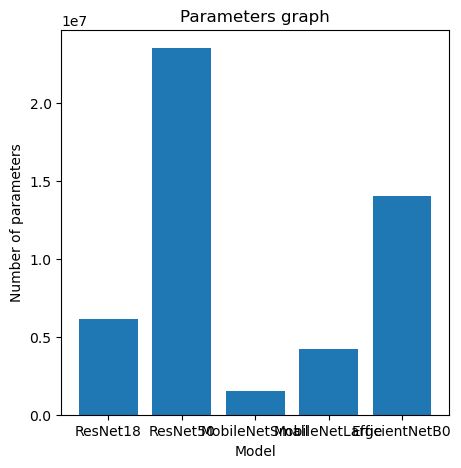

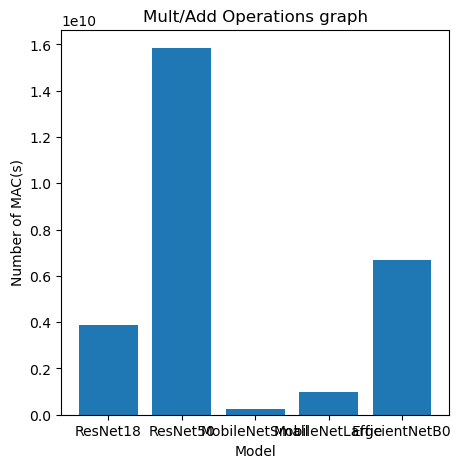

In [24]:
models=['ResNet18', 'ResNet50', 'MobileNetSmall', 'MobileNetLarge', 'EfficientNetB0']
num_params = [res18_params, res50_params, mobnet_sml_params, mobnet_lrg_params, effnetb0_params]
num_macs = [res18_macs, res50_macs, mobnet_sml_macs, mobnet_lrg_macs, effnetb0_macs]

plt.figure(figsize=(5,5))
plt.bar(models, num_params)
plt.title('Parameters graph')
plt.xlabel('Model')
plt.ylabel('Number of parameters')
plt.show()

plt.figure(figsize=(5,5))
plt.bar(models, num_macs)
plt.title('Mult/Add Operations graph')
plt.xlabel('Model')
plt.ylabel('Number of MAC(s)')
plt.show()

